## INFOSYS STOCK MARKET PRICE PREDICTION USING LSTM(Long short-term memory) 
##              FROM [01-07-2015 t0 01-07-2020(5 Years)]
### DATASET FROM NSE INDIA(National Stock Exchange of India Ltd)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


In [4]:
INFOSYS = pd.read_csv("/content/INFY.NS.csv")

In [5]:
INFOSYS.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-01,494.500000,502.500000,493.000000,498.700012,415.561249,6880852.0
1,2015-07-02,499.500000,500.700012,492.524994,494.000000,411.644745,4007568.0
2,2015-07-03,494.000000,496.500000,491.000000,495.149994,412.603058,2695306.0
3,2015-07-06,492.500000,494.000000,487.500000,491.649994,409.686493,4305602.0
4,2015-07-07,492.500000,495.000000,489.500000,490.250000,408.519897,3497418.0
5,2015-07-08,489.500000,489.500000,477.399994,478.750000,398.937103,7024178.0
6,2015-07-09,478.750000,483.000000,467.024994,469.000000,390.812531,8587772.0
7,2015-07-10,474.049988,476.049988,466.325012,468.750000,390.604187,7411522.0
8,2015-07-13,470.500000,477.500000,467.024994,475.075012,395.874756,6531768.0
9,2015-07-14,477.500000,486.750000,472.750000,485.625000,404.665955,5367074.0


In [6]:
INFOSYS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1228 non-null   object 
 1   Open       1227 non-null   float64
 2   High       1227 non-null   float64
 3   Low        1227 non-null   float64
 4   Close      1227 non-null   float64
 5   Adj Close  1227 non-null   float64
 6   Volume     1227 non-null   float64
dtypes: float64(6), object(1)
memory usage: 67.3+ KB


In [9]:
 INFOSYS_NEW=INFOSYS.dropna(axis=0)
 INFOSYS_NEW

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-01,494.500000,502.500000,493.000000,498.700012,415.561249,6880852.0
1,2015-07-02,499.500000,500.700012,492.524994,494.000000,411.644745,4007568.0
2,2015-07-03,494.000000,496.500000,491.000000,495.149994,412.603058,2695306.0
3,2015-07-06,492.500000,494.000000,487.500000,491.649994,409.686493,4305602.0
4,2015-07-07,492.500000,495.000000,489.500000,490.250000,408.519897,3497418.0
...,...,...,...,...,...,...,...
1223,2020-06-23,695.700012,724.500000,692.099976,720.650024,720.650024,12157390.0
1224,2020-06-24,716.900024,726.799988,709.400024,714.150024,714.150024,10220838.0
1225,2020-06-25,704.849976,705.599976,693.500000,700.500000,700.500000,14945284.0
1226,2020-06-26,710.200012,751.599976,710.000000,748.200012,748.200012,26030458.0


In [11]:
INFOSYS_NEW.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1227 entries, 0 to 1227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1227 non-null   object 
 1   Open       1227 non-null   float64
 2   High       1227 non-null   float64
 3   Low        1227 non-null   float64
 4   Close      1227 non-null   float64
 5   Adj Close  1227 non-null   float64
 6   Volume     1227 non-null   float64
dtypes: float64(6), object(1)
memory usage: 76.7+ KB


In [52]:
INFOSYS_NEW['Close']=pd.to_numeric(INFOSYS_NEW.Close,errors='coerce')
INFOSYS_NEW = INFOSYS_NEW.dropna()
INFOSYS_TRAIN = INFOSYS_NEW.iloc[:,4:5].values

In [37]:
INFOSYS_NEW.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1227 entries, 0 to 1227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1227 non-null   object 
 1   Open       1227 non-null   float64
 2   High       1227 non-null   float64
 3   Low        1227 non-null   float64
 4   Close      1227 non-null   float64
 5   Adj Close  1227 non-null   float64
 6   Volume     1227 non-null   float64
dtypes: float64(6), object(1)
memory usage: 76.7+ KB


In [53]:
sc = MinMaxScaler(feature_range=(0,1))
INFOSYS_TRAIN = sc.fit_transform(INFOSYS_TRAIN)
INFOSYS_TRAIN.shape

(1227, 1)

In [54]:
x_train = []
y_train = []

for i in range (60,1227):
  x_train.append(INFOSYS_TRAIN[i-60:i,0])
  y_train.append(INFOSYS_TRAIN[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [55]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1167, 60, 1)

In [58]:
model = Sequential()

model.add(LSTM(units=100, return_sequences= True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences= True))
model.add(Dropout(0.2))


model.add(LSTM(units=100, return_sequences= True))
model.add(Dropout(0.2))


model.add(LSTM(units=100, return_sequences= False))
model.add(Dropout(0.2))


model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [60]:
hist = model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=2)

Epoch 1/20
 - 9s - loss: 0.0063
Epoch 2/20
 - 9s - loss: 0.0054
Epoch 3/20
 - 9s - loss: 0.0049
Epoch 4/20
 - 9s - loss: 0.0054
Epoch 5/20
 - 9s - loss: 0.0049
Epoch 6/20
 - 9s - loss: 0.0047
Epoch 7/20
 - 8s - loss: 0.0054
Epoch 8/20
 - 9s - loss: 0.0051
Epoch 9/20
 - 9s - loss: 0.0042
Epoch 10/20
 - 8s - loss: 0.0042
Epoch 11/20
 - 9s - loss: 0.0045
Epoch 12/20
 - 9s - loss: 0.0038
Epoch 13/20
 - 9s - loss: 0.0036
Epoch 14/20
 - 9s - loss: 0.0036
Epoch 15/20
 - 9s - loss: 0.0037
Epoch 16/20
 - 9s - loss: 0.0035
Epoch 17/20
 - 9s - loss: 0.0034
Epoch 18/20
 - 9s - loss: 0.0035
Epoch 19/20
 - 9s - loss: 0.0030
Epoch 20/20
 - 9s - loss: 0.0036


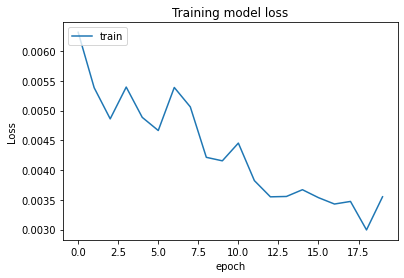

In [61]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [76]:
INFOSYS_NEW.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [92]:
INFOSYS_TEST = pd.read_csv("/content/INFY.NS.csv")
INFOSYS_TEST["Close"]=pd.to_numeric(INFOSYS_TEST.Close, errors='coerce')
INFOSYS_TEST = INFOSYS_TEST.dropna()
INFOSYS_TEST = INFOSYS_TEST.iloc[:,4:5]
y_test = INFOSYS_TEST.iloc[60:,0:].values

inputClosing = INFOSYS_TEST.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
x_test = []
length = len(INFOSYS_TEST)
timestep = 60
for i in range (timestep, length):
  x_test.append(inputClosing_scaled[i-timestep:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape




(1167, 60, 1)

In [88]:
y_predict = model.predict(x_test)
y_predict

array([[0.29796383],
       [0.30271685],
       [0.30667093],
       ...,
       [0.6671327 ],
       [0.6693521 ],
       [0.67803097]], dtype=float32)

In [89]:
predicted_price = sc.inverse_transform(y_predict)

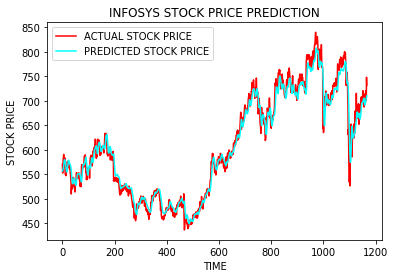

In [90]:
plt.plot(y_test, color='red', label='ACTUAL STOCK PRICE')
plt.plot(predicted_price, color='cyan', label='PREDICTED STOCK PRICE')
plt.title('INFOSYS STOCK PRICE PREDICTION')
plt.xlabel('TIME')
plt.ylabel('STOCK PRICE')
plt.legend()
plt.show()